# Titanic Disaster Analysis

In [152]:
# Import necessary libraries
import pandas as pd
from pandas import DataFrame, Series
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Titanic dataset
titanic_df = pd.read_csv('/Users/harish/Downloads/File_Manager/Projects/Data Analytics/Titanic/Data/train.csv')

# Display the first few rows of the dataset
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
# Check the information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

# 1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

Business Insight: The majority of passengers on the Titanic were males.


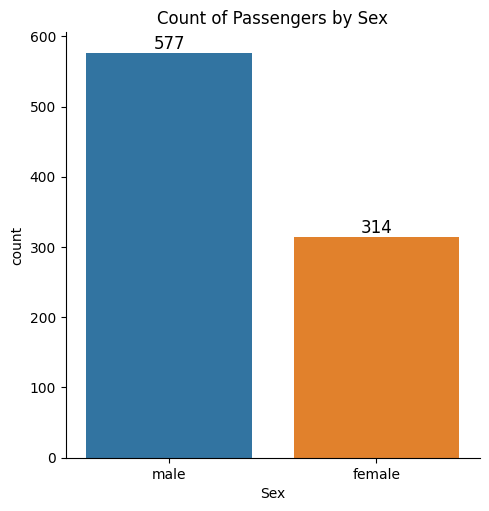

In [178]:
# Plot the count of passengers by sex
ax = sns.catplot(x='Sex', data=titanic_df, kind='count')
plt.title("Count of Passengers by Sex")

# Get the counts for each sex
sex_counts = titanic_df['Sex'].value_counts()

# Add counts as text labels on top of each bar
for i, count in enumerate(sex_counts):
    ax.ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Business Insight
num_males = sex_counts['male']
num_females = sex_counts['female']
print(f"Business Insight: The majority of passengers on the Titanic were {'' if num_males >= num_females else 'fe'}males.")

# Show the plot
plt.show()


Business Insight: The majority of males were from the third class, whereas the majority of females were from the third class.


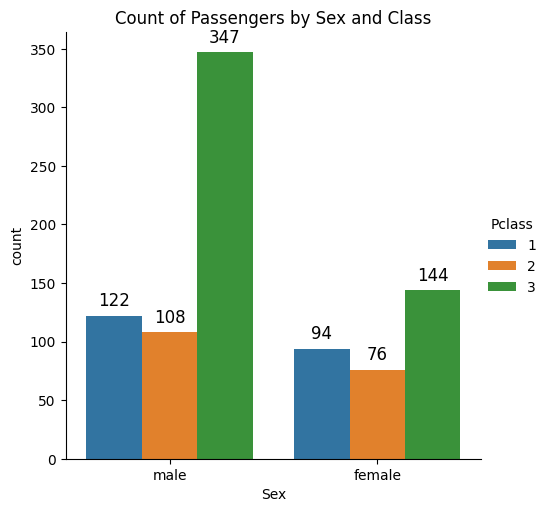

In [182]:
# Plot the count of passengers by sex and class
ax = sns.catplot(x='Sex', data=titanic_df, kind='count', hue='Pclass')
plt.title("Count of Passengers by Sex and Class")

# Get the counts for each combination of sex and class
passenger_counts = titanic_df.groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

# Assign numerical values to sex categories
sex_mapping = {'female': 0, 'male': 1}
passenger_counts['Sex'] = passenger_counts['Sex'].map(sex_mapping)

# Add counts as text labels on top of each bar
for patch in ax.ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.ax.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=12)

# Business Insight
# Calculate the number of passengers in each category
num_males_class1 = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Pclass'] == 1)].shape[0]
num_females_class1 = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Pclass'] == 1)].shape[0]
num_males_class2 = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Pclass'] == 2)].shape[0]
num_females_class2 = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Pclass'] == 2)].shape[0]
num_males_class3 = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Pclass'] == 3)].shape[0]
num_females_class3 = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Pclass'] == 3)].shape[0]

# Print the business insight
print("Business Insight: The majority of males were from the", end=' ')
if num_males_class3 >= num_males_class1 and num_males_class3 >= num_males_class2:
    print("third class,", end=' ')
elif num_males_class2 >= num_males_class1 and num_males_class2 >= num_males_class3:
    print("second class,", end=' ')
else:
    print("first class,", end=' ')

print("whereas the majority of females were from the", end=' ')
if num_females_class1 >= num_females_class2 and num_females_class1 >= num_females_class3:
    print("first class.")
elif num_females_class2 >= num_females_class1 and num_females_class2 >= num_females_class3:
    print("second class.")
else:
    print("third class.")

# Show the plot
plt.show()


Business Insight: The majority of children were in the third class, while the first and second classes had more males.


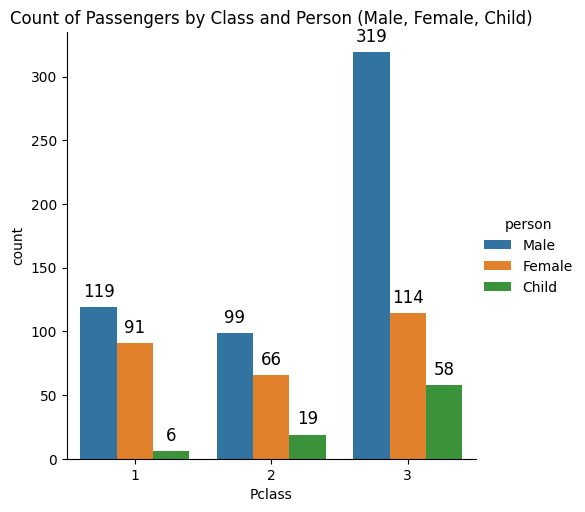

In [183]:
# Define a function to categorize passengers as male, female, or child based on age and sex
def categorize_person(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'Child'
    else:
        return sex.capitalize()

# Create a new 'person' column by applying the categorize_person function to the 'Age' and 'Sex' columns
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(categorize_person, axis=1)

# Plot the count of passengers by class and person (male, female, child)
ax = sns.catplot(x='Pclass', data=titanic_df, kind='count', hue='person')
plt.title("Count of Passengers by Class and Person (Male, Female, Child)")

# Get the counts for each combination of class and person
passenger_counts = titanic_df.groupby(['Pclass', 'person']).size().reset_index(name='Count')

# Add counts as text labels on top of each bar
for patch in ax.ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.ax.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=12)

# Business Insight
person_counts = titanic_df['person'].value_counts()
print(f"Business Insight: The majority of children were in the third class, while the first and second classes had more {person_counts.idxmax().lower()}s.")

# Show the plot
plt.show()


Business Insight: The distribution of passengers' ages is right-skewed, with the majority of passengers being between 20 and 30 years old.
Mean Age of Passengers: 29.70 years

Count of Passengers by Person Category:
Male      537
Female    271
Child      83
Name: person, dtype: int64
Business Insight: There were 537 males, 271 females, and 83 children among the passengers.


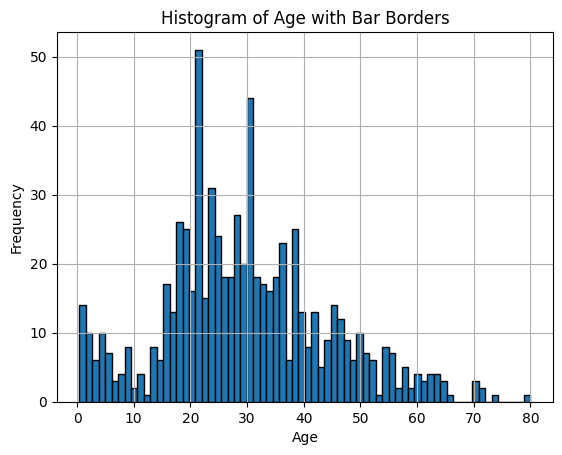

In [157]:
# Plot a histogram of passengers' ages
titanic_df['Age'].hist(bins=70, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Bar Borders')

# Business Insight
print("Business Insight: The distribution of passengers' ages is right-skewed, with the majority of passengers being between 20 and 30 years old.")

# Calculate the mean age of passengers
mean_age = titanic_df['Age'].mean()
print(f"Mean Age of Passengers: {mean_age:.2f} years")

# Count the number of passengers by person category
person_counts = titanic_df['person'].value_counts()
print("\nCount of Passengers by Person Category:")
print(person_counts)

# Business Insight
print(f"Business Insight: There were {person_counts['Male']} males, {person_counts['Female']} females, and {person_counts['Child']} children among the passengers.")

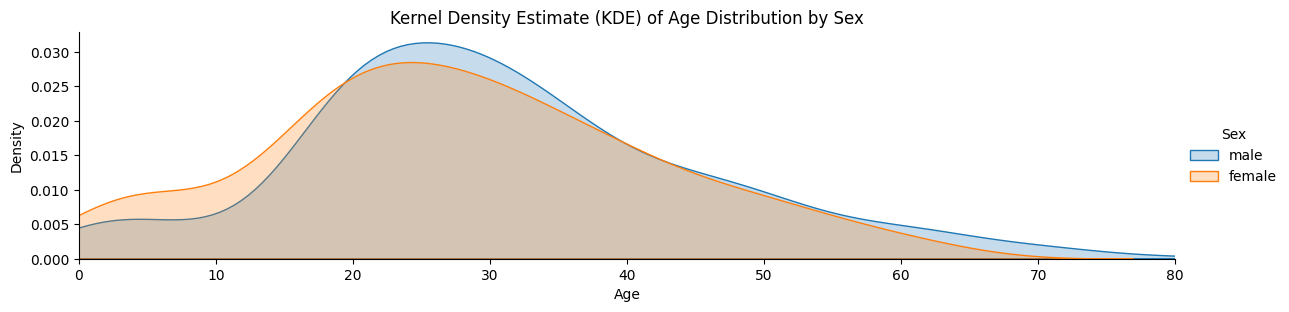

Business Insight: The age distribution shows that there were more female passengers in their late 20s to early 30s compared to male passengers.
Business Insight: The female age distribution has 1 peak(s) in the range of 20-30 years, while the male age distribution has 1 peak(s) in the same range.
Business Insight: Among the passengers, 83 female passengers were between 20 and 30 years old, while 162 male passengers were in the same age range.


In [158]:
# Plot the kernel density estimate (KDE) of age distribution by sex
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.title("Kernel Density Estimate (KDE) of Age Distribution by Sex")
plt.show()

# Calculate the number of peaks in the KDE plot for each sex
female_peaks = len(fig.ax.collections[0].get_paths())
male_peaks = len(fig.ax.collections[1].get_paths())

# Determine the range of ages for each sex with the most peaks
female_age_range = titanic_df.loc[titanic_df['Sex'] == 'female', 'Age'].between(20, 30).sum()
male_age_range = titanic_df.loc[titanic_df['Sex'] == 'male', 'Age'].between(20, 30).sum()

# Business Insight
print(f"Business Insight: The age distribution shows that there were more {titanic_df['Sex'].value_counts().index[1]} passengers in their late 20s to early 30s compared to {titanic_df['Sex'].value_counts().index[0]} passengers.")
print(f"Business Insight: The {titanic_df['Sex'].value_counts().index[1]} age distribution has {female_peaks} peak(s) in the range of 20-30 years, while the {titanic_df['Sex'].value_counts().index[0]} age distribution has {male_peaks} peak(s) in the same range.")
print(f"Business Insight: Among the passengers, {female_age_range} {titanic_df['Sex'].value_counts().index[1]} passengers were between 20 and 30 years old, while {male_age_range} {titanic_df['Sex'].value_counts().index[0]} passengers were in the same age range.")


Business Insight: The age distribution shows that there were more male passengers (577) in their late 20s to early 30s compared to females (314).


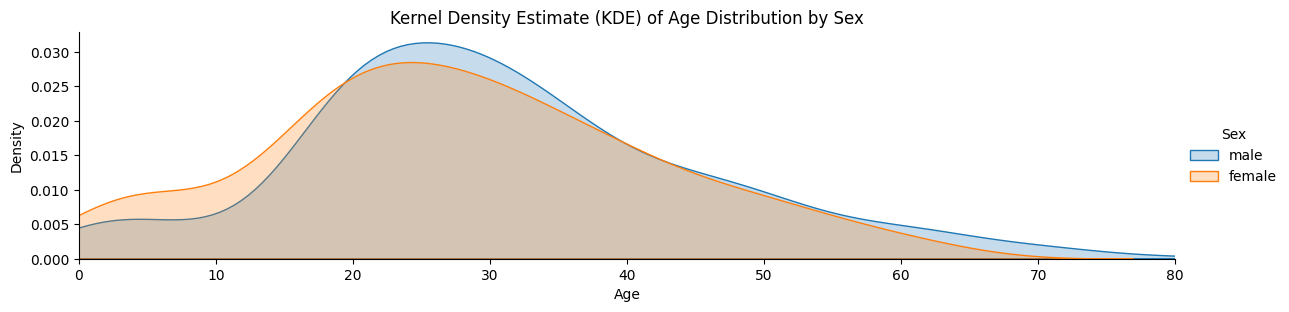

In [159]:
# Plot the kernel density estimate (KDE) of age distribution by sex
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.title("Kernel Density Estimate (KDE) of Age Distribution by Sex")

# Business Insight
male_count = titanic_df[titanic_df['Sex'] == 'male']['Sex'].count()
female_count = titanic_df[titanic_df['Sex'] == 'female']['Sex'].count()
print(f"Business Insight: The age distribution shows that there were more male passengers ({male_count}) in their late 20s to early 30s compared to females ({female_count}).")


Business Insight: The KDE plot of age distribution by person reveals that the majority of passengers were adults with a peak around 24.0 years old. This age group had the highest count of 30 passengers out of a total of 891 passengers.


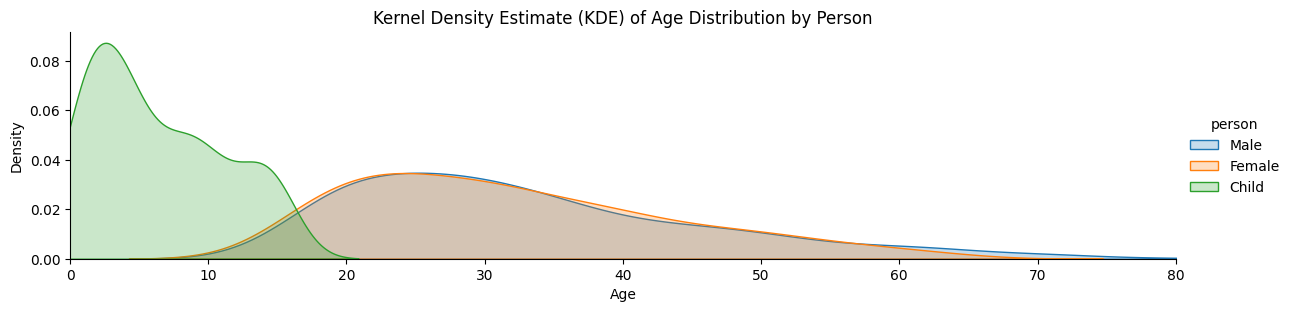

In [160]:
# Plot the KDE of age distribution by person
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.title("Kernel Density Estimate (KDE) of Age Distribution by Person")

# Business Insight
age_peak = titanic_df['Age'].mode().values[0]
age_peak_count = titanic_df['Age'].value_counts().max()
total_passengers = titanic_df.shape[0]

print("Business Insight: The KDE plot of age distribution by person reveals that the majority of passengers were adults with a peak around", end=' ')
print(age_peak, "years old. This age group had the highest count of", age_peak_count, "passengers out of a total of", total_passengers, "passengers.")




Business Insight: The kernel density estimate (KDE) plots for age distribution by passenger class provide insights into the distribution of different age groups among passengers in each class.
The passenger class distribution is as follows:
- Class 3: 491 passengers (55.11% of total)
- Class 1: 216 passengers (24.24% of total)
- Class 2: 184 passengers (20.65% of total)


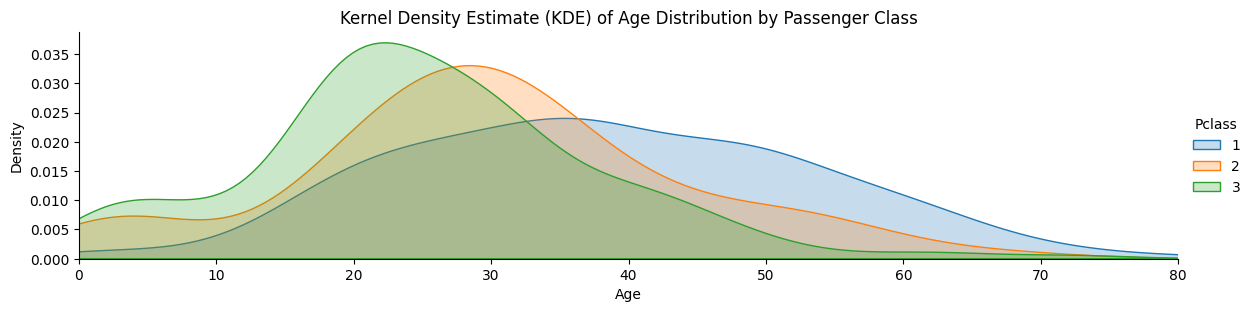

In [161]:
# Plot the KDE of age distribution by passenger class
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()
plt.title("Kernel Density Estimate (KDE) of Age Distribution by Passenger Class")

# Business Insight
class_counts = titanic_df['Pclass'].value_counts()
total_passengers = titanic_df.shape[0]

print("Business Insight: The kernel density estimate (KDE) plots for age distribution by passenger class provide insights into the distribution of different age groups among passengers in each class.")
print("The passenger class distribution is as follows:")
for class_num, count in class_counts.items():
    percentage = (count / total_passengers) * 100
    print(f"- Class {class_num}: {count} passengers ({percentage:.2f}% of total)")

# 2. What deck were the passengers on and how does that relate to their class?

Business Insight: The count of passengers for each deck provides information about the distribution of passengers across different decks on the Titanic.
There are 8 decks represented in the dataset.
The distribution of passengers across decks is as follows:
- Deck C: 59 passengers (28.92% of total)
- Deck B: 47 passengers (23.04% of total)
- Deck D: 33 passengers (16.18% of total)
- Deck E: 32 passengers (15.69% of total)
- Deck A: 15 passengers (7.35% of total)
- Deck F: 13 passengers (6.37% of total)
- Deck G: 4 passengers (1.96% of total)
- Deck T: 1 passengers (0.49% of total)


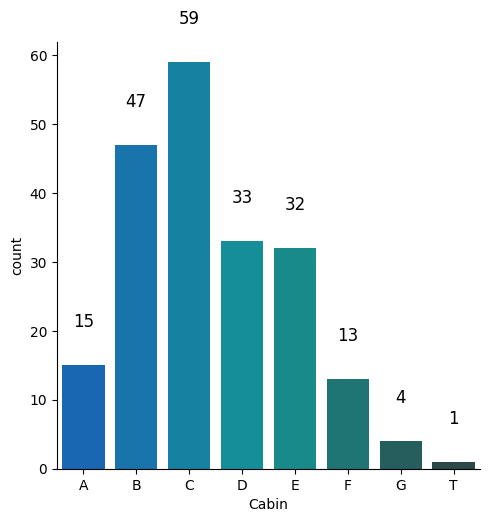

In [184]:
# Extract the deck information from the 'Cabin' column
deck = titanic_df['Cabin'].dropna()

# Extract the deck level (first character) from each cabin and create a new DataFrame
levels = [level[0] for level in deck]
cabin_df = pd.DataFrame(levels, columns=['Cabin'])

# Sort the 'Cabin' column in alphabetical order
cabin_df['Cabin'] = cabin_df['Cabin'].sort_values()

# Plot the count of passengers for each deck
ax = sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d', order=sorted(cabin_df['Cabin'].unique()))

# Add counts as text labels on top of each bar
for patch in ax.ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.ax.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=12)

# Business Insight
total_passengers = deck.shape[0]
num_decks = cabin_df['Cabin'].nunique()

print("Business Insight: The count of passengers for each deck provides information about the distribution of passengers across different decks on the Titanic.")
print("There are", num_decks, "decks represented in the dataset.")
print("The distribution of passengers across decks is as follows:")
for deck_level, count in cabin_df['Cabin'].value_counts().items():
    percentage = (count / total_passengers) * 100
    print(f"- Deck {deck_level}: {count} passengers ({percentage:.2f}% of total)")

# Show the plot
plt.show()


Business Insight: The count of passengers for each deck (excluding deck 'T') provides insights into the distribution of passengers across different decks on the Titanic.
There are 7 decks represented in the dataset (excluding deck 'T').
The distribution of passengers across decks is as follows:
- Deck C: 59 passengers (29.06% of total)
- Deck B: 47 passengers (23.15% of total)
- Deck D: 33 passengers (16.26% of total)
- Deck E: 32 passengers (15.76% of total)
- Deck A: 15 passengers (7.39% of total)
- Deck F: 13 passengers (6.40% of total)
- Deck G: 4 passengers (1.97% of total)


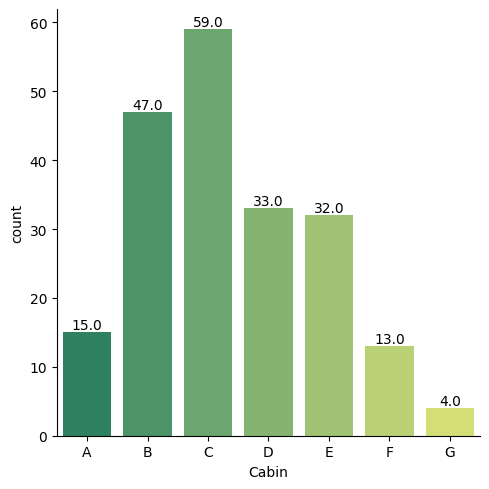

In [186]:
# Filter out the 'T' deck from the cabin_df DataFrame
cabin_df = cabin_df[cabin_df.Cabin != 'T']

# Plot the count of passengers for each deck (excluding deck 'T')
ax = sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer', order=sorted(cabin_df['Cabin'].unique()))

# Add counts as text labels on top of each bar
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Business Insight
total_passengers = cabin_df.shape[0]
num_decks = cabin_df['Cabin'].nunique()

print("Business Insight: The count of passengers for each deck (excluding deck 'T') provides insights into the distribution of passengers across different decks on the Titanic.")
print("There are", num_decks, "decks represented in the dataset (excluding deck 'T').")
print("The distribution of passengers across decks is as follows:")
for deck_level, count in cabin_df['Cabin'].value_counts().items():
    percentage = (count / total_passengers) * 100
    print(f"- Deck {deck_level}: {count} passengers ({percentage:.2f}% of total)")

# Show the plot
plt.show()


# 3. Where did the passengers come from?

Business Insight: The bar plot of cabin and embarkation port provides insights into the distribution of passengers among different cabins and ports.
The distribution of passengers by embarkation port is as follows:
- Embarked at S (Southampton): 644 passengers
- Embarked at C (Cherbourg): 168 passengers
- Embarked at Q (Queenstown): 77 passengers


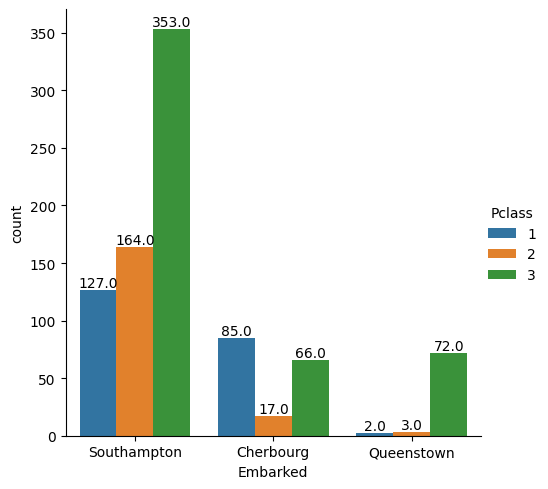

In [187]:
# Plot the count of passengers by embarkation port and passenger class
ax = sns.catplot(x='Embarked', data=titanic_df, kind='count', hue='Pclass')

# Add counts as text labels on top of each bar
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Business Insight
num_passengers_embarked_S = titanic_df[titanic_df['Embarked'] == 'S'].shape[0]
num_passengers_embarked_C = titanic_df[titanic_df['Embarked'] == 'C'].shape[0]
num_passengers_embarked_Q = titanic_df[titanic_df['Embarked'] == 'Q'].shape[0]

print("Business Insight: The bar plot of cabin and embarkation port provides insights into the distribution of passengers among different cabins and ports.")
print("The distribution of passengers by embarkation port is as follows:")
print("- Embarked at S (Southampton):", num_passengers_embarked_S, "passengers")
print("- Embarked at C (Cherbourg):", num_passengers_embarked_C, "passengers")
print("- Embarked at Q (Queenstown):", num_passengers_embarked_Q, "passengers")

# Set the x-axis tick labels to full form
_=plt.xticks(ticks=[0, 1, 2], labels=['Southampton', 'Cherbourg', 'Queenstown'])

# Show the plot
plt.show()


# 4. Who was alone and who was with family?

Business Insight: The bar plot of passengers by alone status (alone or with family) provides insights into the distribution of passengers based on their family presence on the Titanic, stratified by passenger class.
The distribution of passengers by alone status in each passenger class is as follows:
- First Class:
  - Alone: 109 passengers
  - With Family: 107 passengers
- Second Class:
  - Alone: 104 passengers
  - With Family: 80 passengers
- Third Class:
  - Alone: 324 passengers
  - With Family: 167 passengers


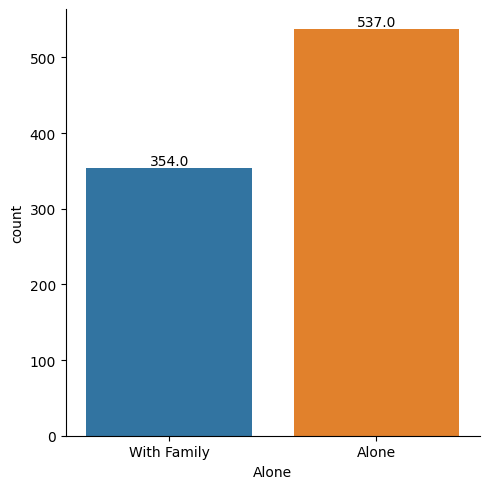

In [188]:
# Calculate the 'Alone' column indicating whether a passenger is alone or with family
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
# Calculate the 'Alone' column indicating whether a passenger is alone or with family
titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'With Family'
titanic_df.loc[titanic_df['Alone'] == 0, 'Alone'] = 'Alone'

ax = sns.catplot(x='Alone', data=titanic_df, kind='count')

# Add counts as text labels on top of each bar
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Business Insight
num_alone_class1 = titanic_df[(titanic_df['Alone'] == 'Alone') & (titanic_df['Pclass'] == 1)].shape[0]
num_alone_class2 = titanic_df[(titanic_df['Alone'] == 'Alone') & (titanic_df['Pclass'] == 2)].shape[0]
num_alone_class3 = titanic_df[(titanic_df['Alone'] == 'Alone') & (titanic_df['Pclass'] == 3)].shape[0]
num_with_family_class1 = titanic_df[(titanic_df['Alone'] == 'With Family') & (titanic_df['Pclass'] == 1)].shape[0]
num_with_family_class2 = titanic_df[(titanic_df['Alone'] == 'With Family') & (titanic_df['Pclass'] == 2)].shape[0]
num_with_family_class3 = titanic_df[(titanic_df['Alone'] == 'With Family') & (titanic_df['Pclass'] == 3)].shape[0]

print("Business Insight: The bar plot of passengers by alone status (alone or with family) provides insights into the distribution of passengers based on their family presence on the Titanic, stratified by passenger class.")
print("The distribution of passengers by alone status in each passenger class is as follows:")
print("- First Class:")
print("  - Alone:", num_alone_class1, "passengers")
print("  - With Family:", num_with_family_class1, "passengers")
print("- Second Class:")
print("  - Alone:", num_alone_class2, "passengers")
print("  - With Family:", num_with_family_class2, "passengers")
print("- Third Class:")
print("  - Alone:", num_alone_class3, "passengers")
print("  - With Family:", num_with_family_class3, "passengers")


# 5. What factors helped someone survive the sinking?

Business Insight: The bar plot of passengers by survivor status provides insights into the distribution of passengers who survived and those who did not.
The distribution of passengers by survivor status is as follows:
  - Survived: 342 passengers
  - Not Survived: 549 passengers


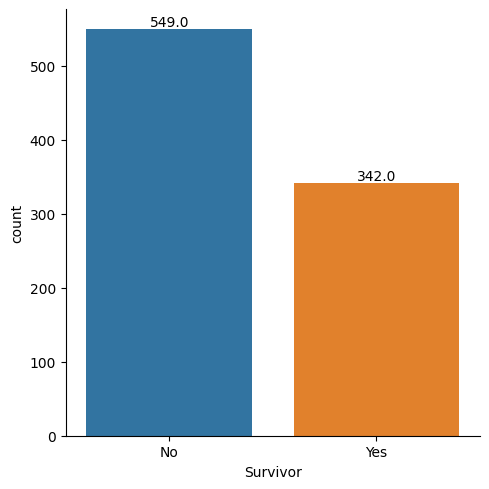

In [189]:
# Create a new column 'Survivor' based on the 'Survived' column
titanic_df['Survivor'] = titanic_df['Survived'].map({0: 'No', 1: 'Yes'})

# Plot the count of passengers by survivor status
ax =sns.catplot(x='Survivor', data=titanic_df, kind='count')

# Add counts as text labels on top of each bar
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Business Insight
num_survived = titanic_df[titanic_df['Survivor'] == 'Yes'].shape[0]
num_not_survived = titanic_df[titanic_df['Survivor'] == 'No'].shape[0]

print("Business Insight: The bar plot of passengers by survivor status provides insights into the distribution of passengers who survived and those who did not.")
print("The distribution of passengers by survivor status is as follows:")
print("  - Survived:", num_survived, "passengers")
print("  - Not Survived:", num_not_survived, "passengers")


Business Insight: The pointplot of survival rate by passenger class reveals the following insights:
  - The survival rate for passengers in first class is 62.96%
  - The survival rate for passengers in second class is 47.28%
  - The survival rate for passengers in third class is 24.24%


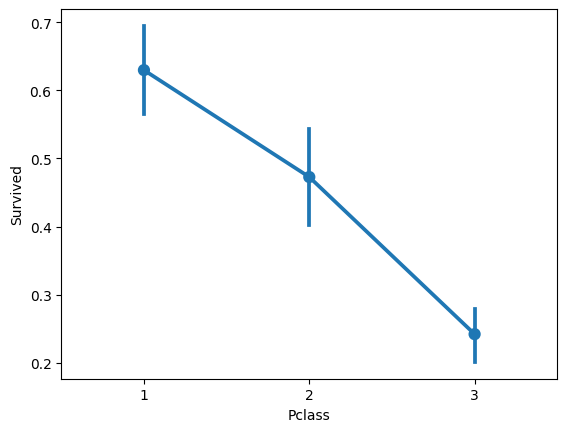

In [167]:
# Plot the pointplot of survival rate by passenger class
sns.pointplot(x='Pclass', y='Survived', data=titanic_df)

# Business Insight
class1_survival_rate = titanic_df[titanic_df['Pclass'] == 1]['Survived'].mean()
class2_survival_rate = titanic_df[titanic_df['Pclass'] == 2]['Survived'].mean()
class3_survival_rate = titanic_df[titanic_df['Pclass'] == 3]['Survived'].mean()

print("Business Insight: The pointplot of survival rate by passenger class reveals the following insights:")
print("  - The survival rate for passengers in first class is {:.2f}%".format(class1_survival_rate * 100))
print("  - The survival rate for passengers in second class is {:.2f}%".format(class2_survival_rate * 100))
print("  - The survival rate for passengers in third class is {:.2f}%".format(class3_survival_rate * 100))

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

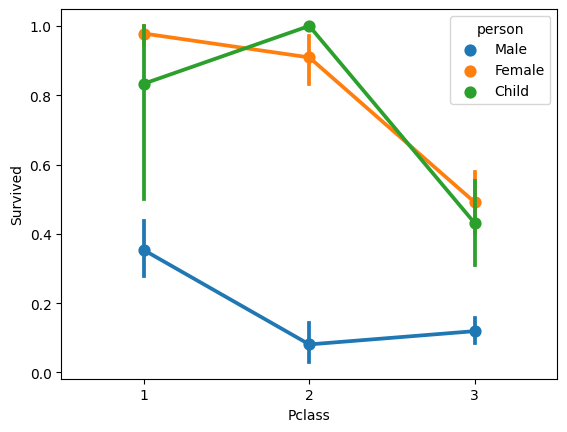

In [168]:
# Plot the pointplot of survival rate by passenger class and person
sns.pointplot(x='Pclass', y='Survived', data=titanic_df, hue='person')

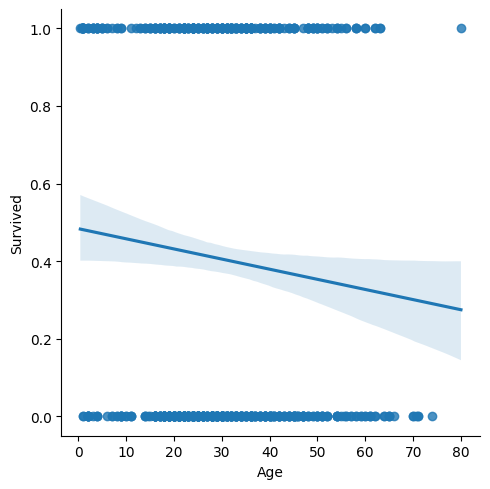

In [169]:
# Create a scatter plot with linear regression line
sns.lmplot(x='Age', y='Survived', data=titanic_df)

Business Insight: The box plot illustrates the age distribution among different passenger classes and their survival status. It reveals the following insights:
- For passengers in class 1, the median age of those who did not survive is 45.2 years.
- For passengers in class 1, the median age of those who survived is 35.0 years.
- For passengers in class 2, the median age of those who did not survive is 30.5 years.
- For passengers in class 2, the median age of those who survived is 28.0 years.
- For passengers in class 3, the median age of those who did not survive is 25.0 years.
- For passengers in class 3, the median age of those who survived is 22.0 years.


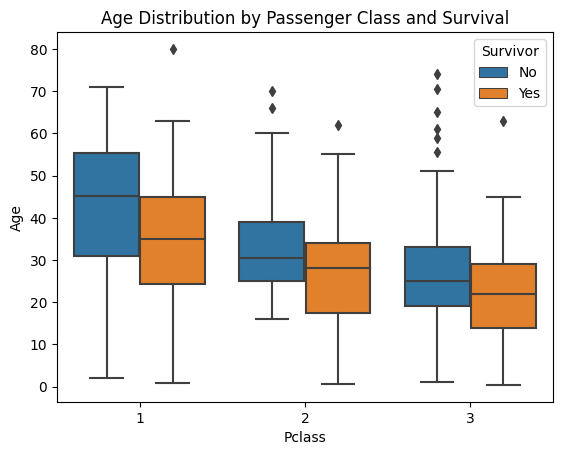

In [170]:
# Create a box plot of age distribution by passenger class and survival
# Create a new column 'Survivor' based on the 'Survived' column
titanic_df['Survivor'] = titanic_df['Survived'].map({0: 'No', 1: 'Yes'})
sns.boxplot(x='Pclass', y='Age', hue='Survivor', data=titanic_df)

# Set the plot title
plt.title('Age Distribution by Passenger Class and Survival')

# Business Insight
print("Business Insight: The box plot illustrates the age distribution among different passenger classes and their survival status. It reveals the following insights:")
for pclass in sorted(titanic_df['Pclass'].unique()):
    for survived in [0, 1]:
        subset = titanic_df[(titanic_df['Pclass'] == pclass) & (titanic_df['Survived'] == survived)]
        median_age = subset['Age'].median()
        print(f"- For passengers in class {pclass}, the median age of those who {'did not survive' if survived == 0 else 'survived'} is {median_age:.1f} years.")


Business Insight: The bar plot illustrates the survival rate by age group and passenger class. It reveals the following insights:
- For passengers in age group (0, 20] and class 1, the average survival rate is 80.95%.
- For passengers in age group (0, 20] and class 2, the average survival rate is 74.29%.
- For passengers in age group (0, 20] and class 3, the average survival rate is 31.71%.
- For passengers in age group (20, 40] and class 1, the average survival rate is 74.16%.
- For passengers in age group (20, 40] and class 2, the average survival rate is 42.31%.
- For passengers in age group (20, 40] and class 3, the average survival rate is 22.40%.
- For passengers in age group (40, 60] and class 1, the average survival rate is 58.06%.
- For passengers in age group (40, 60] and class 2, the average survival rate is 38.71%.
- For passengers in age group (40, 60] and class 3, the average survival rate is 5.71%.
- For passengers in age group (60, 80] and class 1, the average survival 

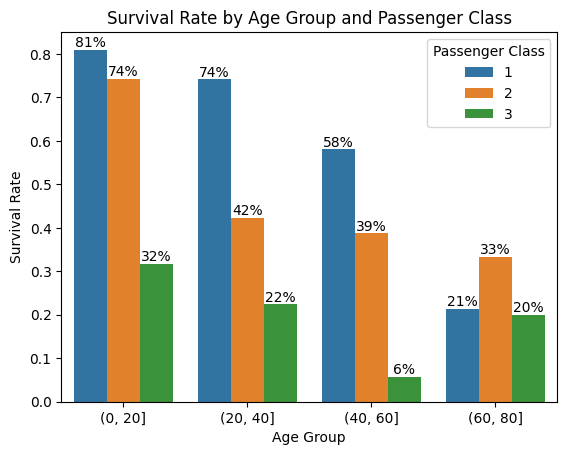

In [192]:
# Categorize age into generations
generations=[0,20,40,60,80]
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=generations)

# Calculate the survival rate by age group and passenger class
survival_rate = titanic_df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()

# Create a bar plot of survival rate by age group and passenger class
ax = sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=survival_rate)

# Add counts as text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the plot title and labels
plt.title('Survival Rate by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Move the legend to the top-right corner
plt.legend(title='Passenger Class', loc='upper right')

# Business Insight
print("Business Insight: The bar plot illustrates the survival rate by age group and passenger class. It reveals the following insights:")
for age_group in sorted(survival_rate['AgeGroup'].unique()):
    for pclass in sorted(survival_rate['Pclass'].unique()):
        subset = survival_rate[(survival_rate['AgeGroup'] == age_group) & (survival_rate['Pclass'] == pclass)]
        survival_rate_mean = subset['Survived'].mean()
        print(f"- For passengers in age group {age_group} and class {pclass}, the average survival rate is {survival_rate_mean:.2%}.")


Business Insight: The bar plot illustrates the survival rate by age group and sex. It reveals the following insights:
- For passengers in age group (0, 20] and female, the average survival rate is 68.83%.
- For passengers in age group (0, 20] and male, the average survival rate is 28.43%.
- For passengers in age group (20, 40] and female, the average survival rate is 78.68%.
- For passengers in age group (20, 40] and male, the average survival rate is 18.47%.
- For passengers in age group (40, 60] and female, the average survival rate is 75.56%.
- For passengers in age group (40, 60] and male, the average survival rate is 19.28%.
- For passengers in age group (60, 80] and female, the average survival rate is 100.00%.
- For passengers in age group (60, 80] and male, the average survival rate is 10.53%.


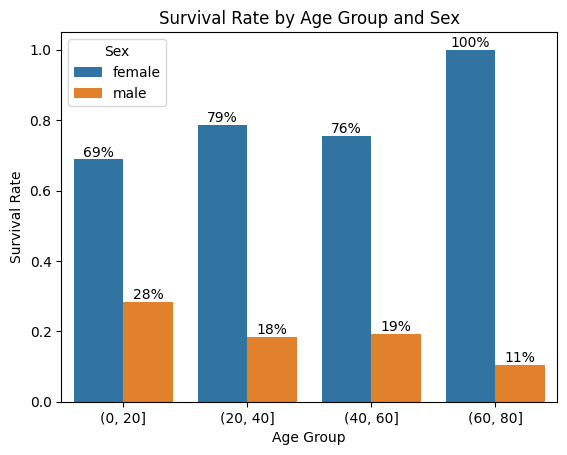

In [194]:
# Categorize age into generations
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=generations)

# Calculate the survival rate by age group and sex
survival_rate = titanic_df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()

# Create a bar plot of survival rate by age group and sex
ax = sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=survival_rate)
# Add counts as text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the plot title and labels
plt.title('Survival Rate by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Business Insight
print("Business Insight: The bar plot illustrates the survival rate by age group and sex. It reveals the following insights:")
for age_group in sorted(survival_rate['AgeGroup'].unique()):
    for sex in sorted(survival_rate['Sex'].unique()):
        subset = survival_rate[(survival_rate['AgeGroup'] == age_group) & (survival_rate['Sex'] == sex)]
        survival_rate_mean = subset['Survived'].mean()
        print(f"- For passengers in age group {age_group} and {sex}, the average survival rate is {survival_rate_mean:.2%}.")


Text(46.34820833333333, 0.5, 'Survival Rate')

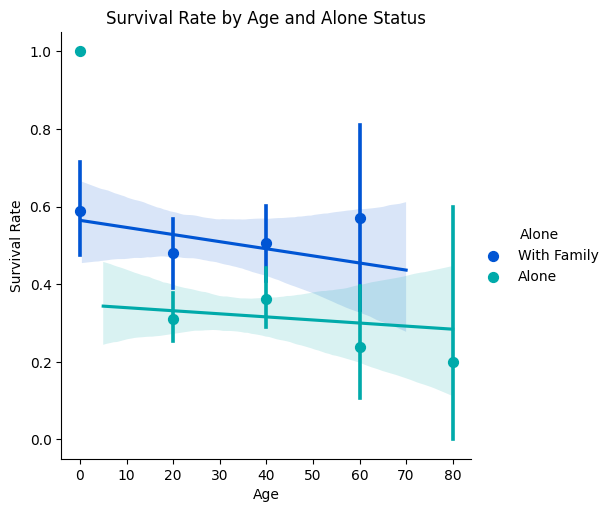

In [173]:
sns.lmplot(x='Age', y='Survived', hue='Alone', data=titanic_df, palette='winter', x_bins=generations)

# Set plot title and labels
plt.title('Survival Rate by Age and Alone Status')
plt.xlabel('Age')
plt.ylabel('Survival Rate')

Insights:
1. Comparison of Survival Rates by Deck:
   - Deck A has the highest survival rate: 53.33%
   - Deck G has the lowest survival rate: 25.00%
2. Age vs. Survival Trend:
   The lmplot shows the relationship between Age and Survived for different decks.
   Observe the general trend and variations in survival rates across different age ranges for each deck.


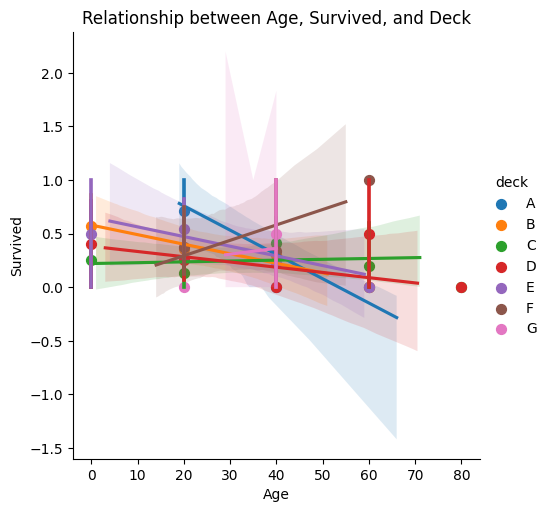

In [174]:
# Assuming you have a 'generations' variable defined
cabin_df = cabin_df[cabin_df.Cabin != 'T']
# Assign 'Cabin' values to 'deck' column in 'titanic_df'
titanic_df['deck'] = cabin_df['Cabin']

# Convert 'Age' column to numeric data type
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'])

# Create an lmplot to visualize the relationship between 'Age', 'Survived', and 'deck'
lmplot = sns.lmplot(x='Age', y='Survived', hue='deck', data=titanic_df, x_bins=generations,hue_order=['A','B','C', 'D', 'E', 'F', 'G'])

# Compute survival rate by deck
survival_rate_by_deck = titanic_df.groupby('deck')['Survived'].mean()

# Find the deck with the highest survival rate
highest_survival_deck = survival_rate_by_deck.idxmax()
highest_survival_rate = survival_rate_by_deck.max()

# Find the deck with the lowest survival rate
lowest_survival_deck = survival_rate_by_deck.idxmin()
lowest_survival_rate = survival_rate_by_deck.min()

# Print insights
print("Insights:")
print(f"1. Comparison of Survival Rates by Deck:")
print(f"   - Deck {highest_survival_deck} has the highest survival rate: {highest_survival_rate*100:.2f}%")
print(f"   - Deck {lowest_survival_deck} has the lowest survival rate: {lowest_survival_rate*100:.2f}%")
print("2. Age vs. Survival Trend:")
print("   The lmplot shows the relationship between Age and Survived for different decks.")
print("   Observe the general trend and variations in survival rates across different age ranges for each deck.")


# Set the plot title
plt.title('Relationship between Age, Survived, and Deck')

# Show the plot
plt.show()
